In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [4]:
golf_scores = pd.read_csv('jake_golf_scores.csv')

In [5]:
golf_scores.head()

DateOfRound  Score  Putts  PuttsInsideTenFeetAttempted  \
0   6/25/2020     76     36                           21   
1   6/26/2020     72     31                           19   
2   6/29/2020     70     30                           20   
3   6/30/2020     72     33                           21   
4    7/1/2020     72     32                           17   

   PuttsInsideTenFeetMade  PuttsInsideTenFeetMakePercentage  Fairways  Greens  \
0                      18                         85.714286         7      13   
1                      17                         89.473684        11      12   
2                      16                         80.000000         6      11   
3                      17                         80.952381         6      13   
4                      16                         94.117647         6      10   

   Inside100  UpAndDownAttempts  UpAndDownSuccess  UpAndDownSuccessPercentage  
0         43                  5                 0                    0.000000  
1         41                  6                 3                   50.000000  
2         41                  7                 3                   42.857143  
3         43                  5                 2                   40.000000  
4         42                  8                 3                   37.500000

In [6]:
golf_scores_num = golf_scores.drop(columns = 'DateOfRound')

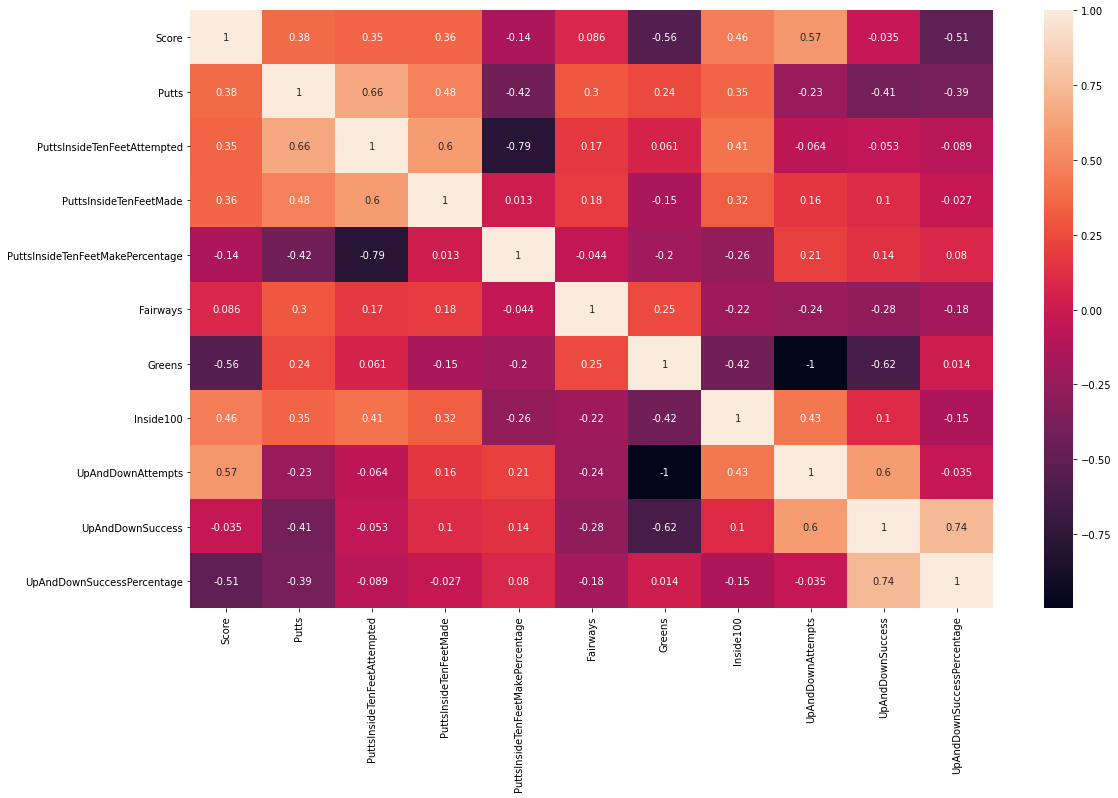

In [7]:
golf_scores_num_correlations = golf_scores_num.corr()
plt.figure(figsize = (18,11))
sns.heatmap(golf_scores_num_correlations, annot = True);

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import linear_model 

In [81]:
base_features = ['Putts', 'PuttsInsideTenFeetAttempted', 'PuttsInsideTenFeetMade', 'PuttsInsideTenFeetMakePercentage', 'Fairways', 'Greens', 'Inside100', 'UpAndDownAttempts', 'UpAndDownSuccess', 'UpAndDownSuccessPercentage']
X = golf_scores_num[base_features]
X

Putts  PuttsInsideTenFeetAttempted  PuttsInsideTenFeetMade  \
0      36                           21                      18   
1      31                           19                      17   
2      30                           20                      16   
3      33                           21                      17   
4      32                           17                      16   
5      31                           21                      16   
6      31                           20                      17   
7      30                           16                      15   
8      34                           20                      18   
9      33                           21                      17   
10     32                           18                      17   
11     34                           20                      18   
12     32                           21                      18   
13     29                           17                      16   
14     28                           16                      14   
15     30                           21                      18   
16     32                           20                      17   
17     32                           20                      18   
18     31                           21                      18   
19     30                           20                      17   
20     32                           18                      17   
21     30                           18                      18   
22     32                           21                      18   
23     39                           25                      18   
24     31                           20                      18   
25     31                           19                      17   
26     30                           18                      16   
27     33                           19                      18   
28     31                           19                      16   
29     30                           16                      16   
30     34                           23                      18   
31     31                           18                      16   
32     32                           20                      16   
33     33                           22                      16   
34     31                           19                      18   
35     32                           21                      18   
36     34                           18                      16   

    PuttsInsideTenFeetMakePercentage  Fairways  Greens  Inside100  \
0                          85.714286         7      13         43   
1                          89.473684        11      12         41   
2                          80.000000         6      11         41   
3                          80.952381         6      13         43   
4                          94.117647         6      10         42   
5                          76.190476         6      12         45   
6                          85.000000         4      10         41   
7                          93.750000         5       7         44   
8                          90.000000        10      11         44   
9                          80.952381         7      12         43   
10                         94.444444         7      15         40   
11                         90.000000         6       7         47   
12                         85.714286         6       9         43   
13                         94.117647         6      10         42   
14                         87.500000         2       9         44   
15                         85.714286         5       5         45   
16                         85.000000         6      11         43   
17                         90.000000         4      14         42   
18                         85.714286         4       5         48   
19                         85.000000         6      11         42   
20                         94.444444         4

In [10]:
y = golf_scores_num.Score 
y.head()

0    76
1    72
2    70
3    72
4    72
Name: Score, dtype: int64

In [11]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(29, 10) (8, 10) (29,) (8,)


In [17]:
print(X.shape, y.shape)

(37, 10) (37,)


In [56]:
lr = LogisticRegression(max_iter = 2000)
lr_cv = cross_val_score(lr, X, y, cv = 8)
print(100 * lr_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * lr_cv.mean()))

[ 0. 20.  0. 40. 20.  0. 25. 25.]

CV Mean: 16.25%


In [57]:
# Difference between training and test set for Logistic Regression model 
from sklearn.metrics import accuracy_score
lr.fit(train_X, train_y)
lr_train_acc = accuracy_score(y_true=train_y, y_pred=lr.predict(train_X))
lr_test_acc = accuracy_score(y_true=val_y, y_pred=lr.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * lr_train_acc))
print('Test Accuracy: %.2f%%' % (100 * lr_test_acc))
print()

Training Accuracy: 89.66%
Test Accuracy: 12.50%



In [58]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_cv = cross_val_score(dt, X, y, cv = 8)
print(100 * dt_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * dt_cv.mean()))

[ 0. 40.  0.  0.  0. 25. 25. 25.]

CV Mean: 14.37%


In [59]:
dt.fit(train_X, train_y)
dt_train_acc = accuracy_score(y_true=train_y, y_pred=dt.predict(train_X))
dt_test_acc = accuracy_score(y_true=val_y, y_pred=dt.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * dt_train_acc))
print('Test Accuracy: %.2f%%' % (100 * dt_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 37.50%



In [60]:
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn, X, y, cv = 8)
print(100 * knn_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * knn_cv.mean()))

[60.  0.  0. 20. 20. 50.  0. 50.]

CV Mean: 25.00%


In [61]:
knn.fit(train_X, train_y)
knn_train_acc = accuracy_score(y_true=train_y, y_pred=knn.predict(train_X))
knn_test_acc = accuracy_score(y_true=val_y, y_pred=knn.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * knn_train_acc))
print('Test Accuracy: %.2f%%' % (100 * knn_test_acc))
print()

Training Accuracy: 41.38%
Test Accuracy: 12.50%



In [62]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf_cv = cross_val_score(rf, X, y, cv = 8)
print(100 * rf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * rf_cv.mean()))

[20. 20.  0. 40. 20. 25. 50. 25.]

CV Mean: 25.00%


In [63]:
rf.fit(train_X, train_y)
rf_train_acc = accuracy_score(y_true=train_y, y_pred=rf.predict(train_X))
rf_test_acc = accuracy_score(y_true=val_y, y_pred=rf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * rf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * rf_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 37.50%



In [64]:
svc = SVC(probability = True)
svc_cv = cross_val_score(svc, X, y, cv = 8)
print(100 * svc_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * svc_cv.mean()))

[20. 20. 20. 20. 20. 25. 25. 25.]

CV Mean: 21.88%


In [65]:
svc.fit(train_X, train_y)
svc_train_acc = accuracy_score(y_true=train_y, y_pred=svc.predict(train_X))
svc_test_acc = accuracy_score(y_true=val_y, y_pred=svc.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * svc_train_acc))
print('Test Accuracy: %.2f%%' % (100 * svc_test_acc))
print()

Training Accuracy: 24.14%
Test Accuracy: 12.50%



In [66]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_cv = cross_val_score(xgb, X, y, cv = 8)
print(100 * xgb_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * xgb_cv.mean()))

[16:49:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [67]:
xgb.fit(train_X, train_y)
xgb_train_acc = accuracy_score(y_true=train_y, y_pred=xgb.predict(train_X))
xgb_test_acc = accuracy_score(y_true=val_y, y_pred=xgb.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * xgb_train_acc))
print('Test Accuracy: %.2f%%' % (100 * xgb_test_acc))
print()

[16:49:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.00%
Test Accuracy: 25.00%



In [68]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cv = cross_val_score(reg, X, y, cv = 8, scoring = 'neg_mean_squared_error')
print(-1 * cv)
print()
print('CV Mean:' + str((-1 * cv.mean())))

[ 4.54556263  3.44895682  7.38162946  2.56369112  3.51418557  7.11501693
 12.49790221  6.54098772]

CV Mean:5.95099155686836


In [69]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier (estimators = [('lr', lr), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'soft')
voting_clf_cv = cross_val_score(voting_clf, X, y, cv = 8)
print(100 * voting_clf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * voting_clf_cv.mean()))

[16:49:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [70]:
voting_clf.fit(train_X, train_y)
voting_clf_train_acc = accuracy_score(y_true=train_y, y_pred=voting_clf.predict(train_X))
voting_clf_test_acc = accuracy_score(y_true=val_y, y_pred=voting_clf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * voting_clf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * voting_clf_test_acc))
print()

[16:49:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.00%
Test Accuracy: 37.50%



In [71]:
# Compare all results in data frame
results_on_val_X = [lr_test_acc, dt_test_acc, rf_test_acc, knn_test_acc, xgb_test_acc, svc_test_acc, voting_clf_test_acc]
results_on_val_X = pd.DataFrame(results_on_val_X)
results_on_val_X = results_on_val_X.rename(columns = {0: 'Test Accuracy'})
results_on_val_X['Test Accuracy'] = 100 * results_on_val_X['Test Accuracy']
results_on_val_X = results_on_val_X.rename(index = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN', 4: 'XGB Classifier', 5: 'SVC', 6: 'Voting Classifier'})
results_on_val_X['CV Accuracy'] = [lr_cv.mean(), dt_cv.mean(), rf_cv.mean(), knn_cv.mean(), xgb_cv.mean(), svc_cv.mean(), voting_clf_cv.mean()]
results_on_val_X['CV Accuracy'] = 100 * results_on_val_X['CV Accuracy']
results_on_val_X

Test Accuracy  CV Accuracy
Logistic Regression           12.5       16.250
Decision Tree                 37.5       14.375
Random Forest                 37.5       25.000
KNN                           12.5       25.000
XGB Classifier                25.0       22.500
SVC                           12.5       21.875
Voting Classifier             37.5       19.375

In [85]:
import graphviz

tree_graph = tree.export_graphviz(dt, out_file=None, feature_names= base_features)
graphviz.Source(tree_graph)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [72]:
import eli5
from eli5.sklearn import PermutationImportance
lr.fit(train_X, train_y)
perm = PermutationImportance(lr, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

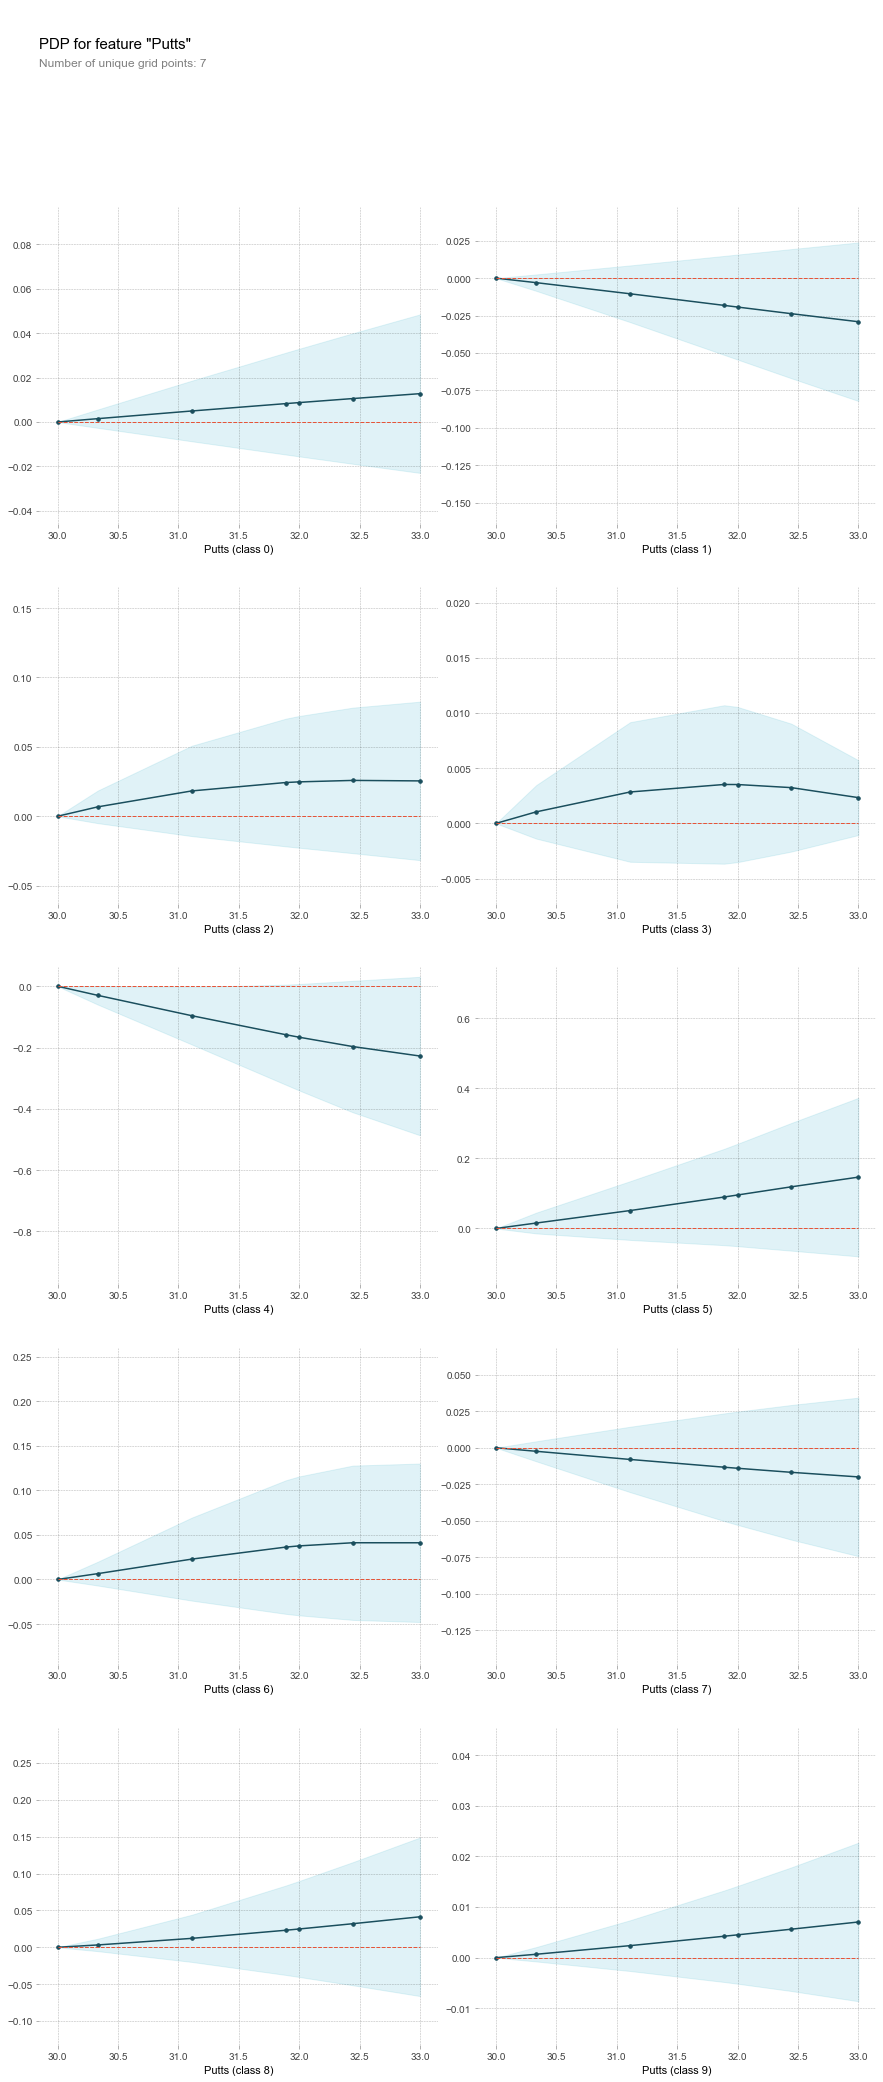

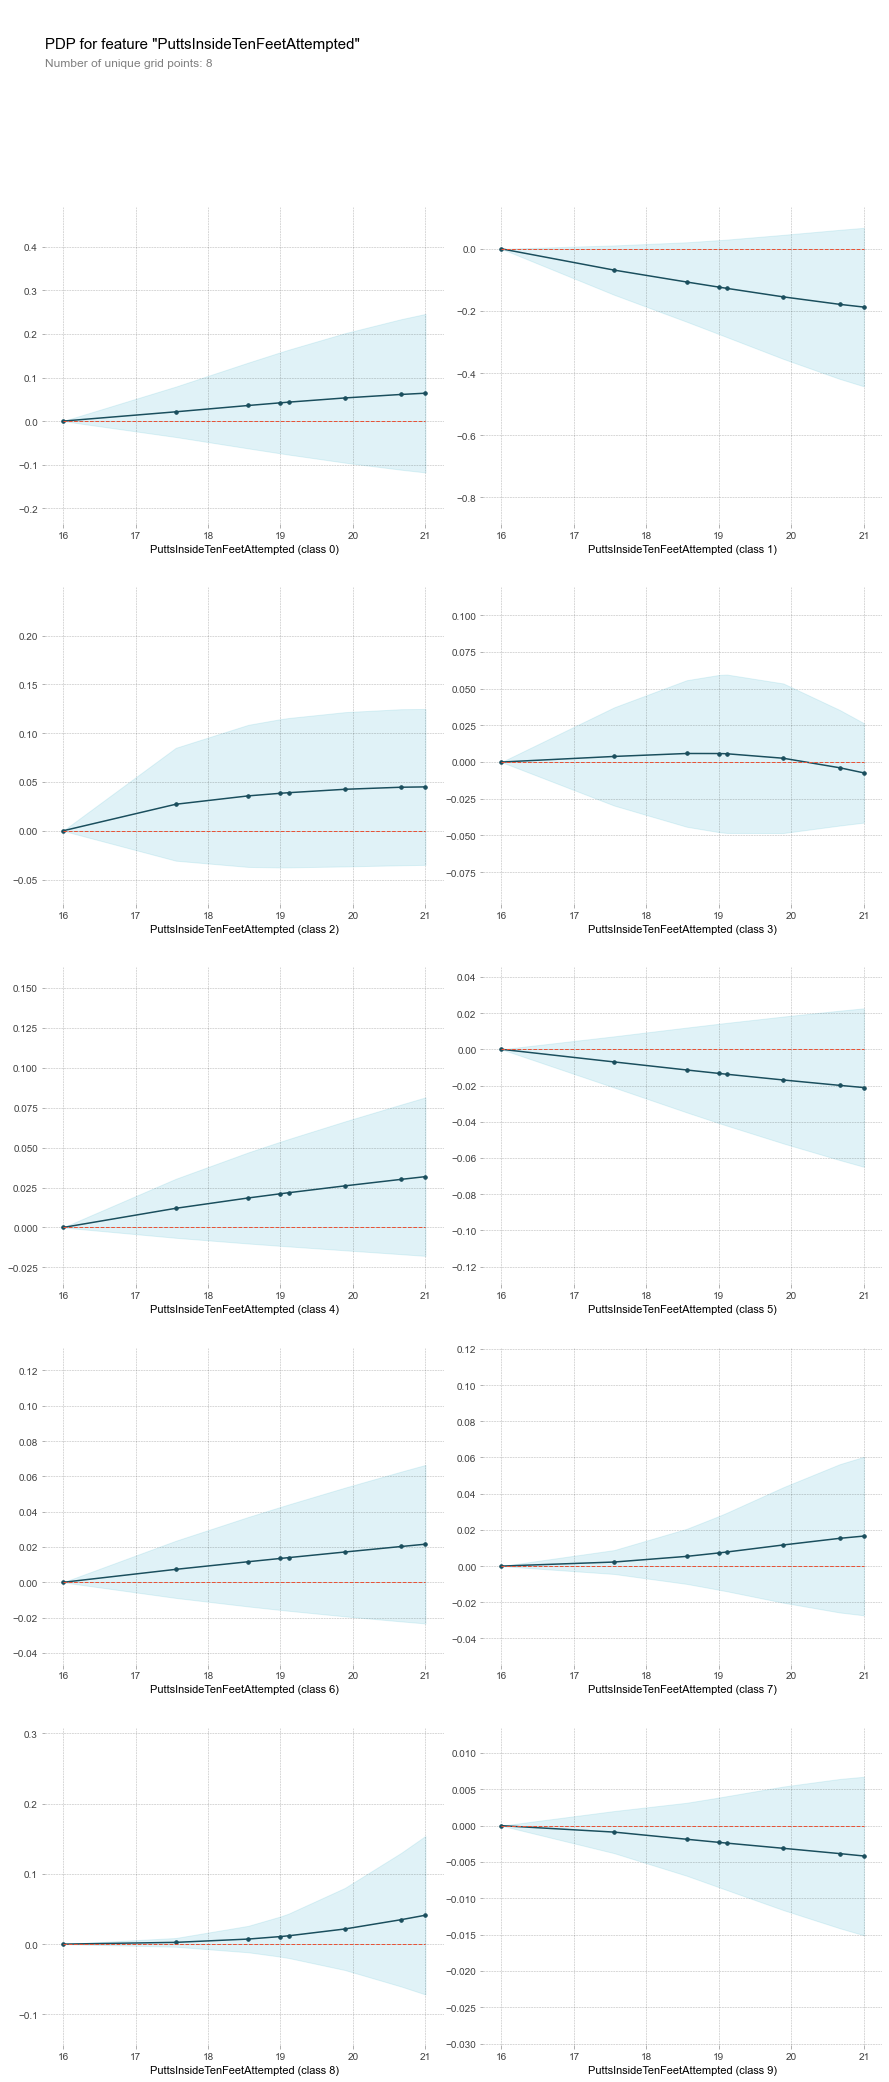

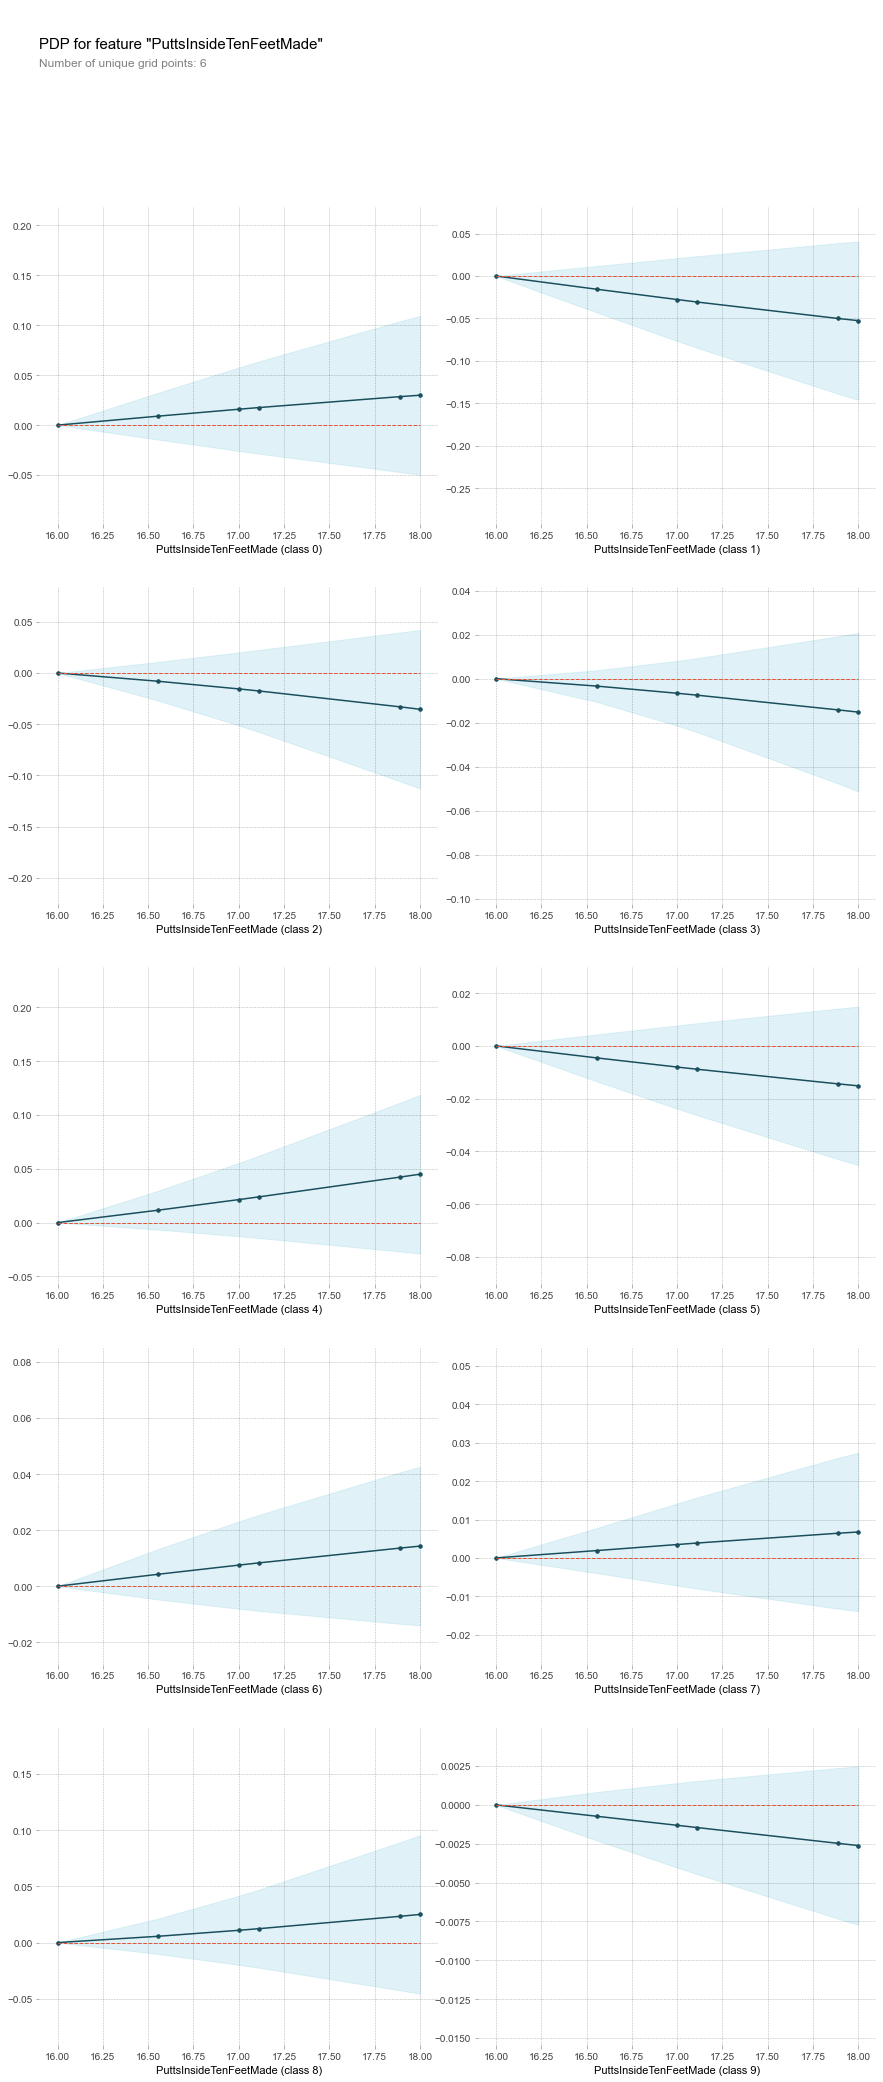

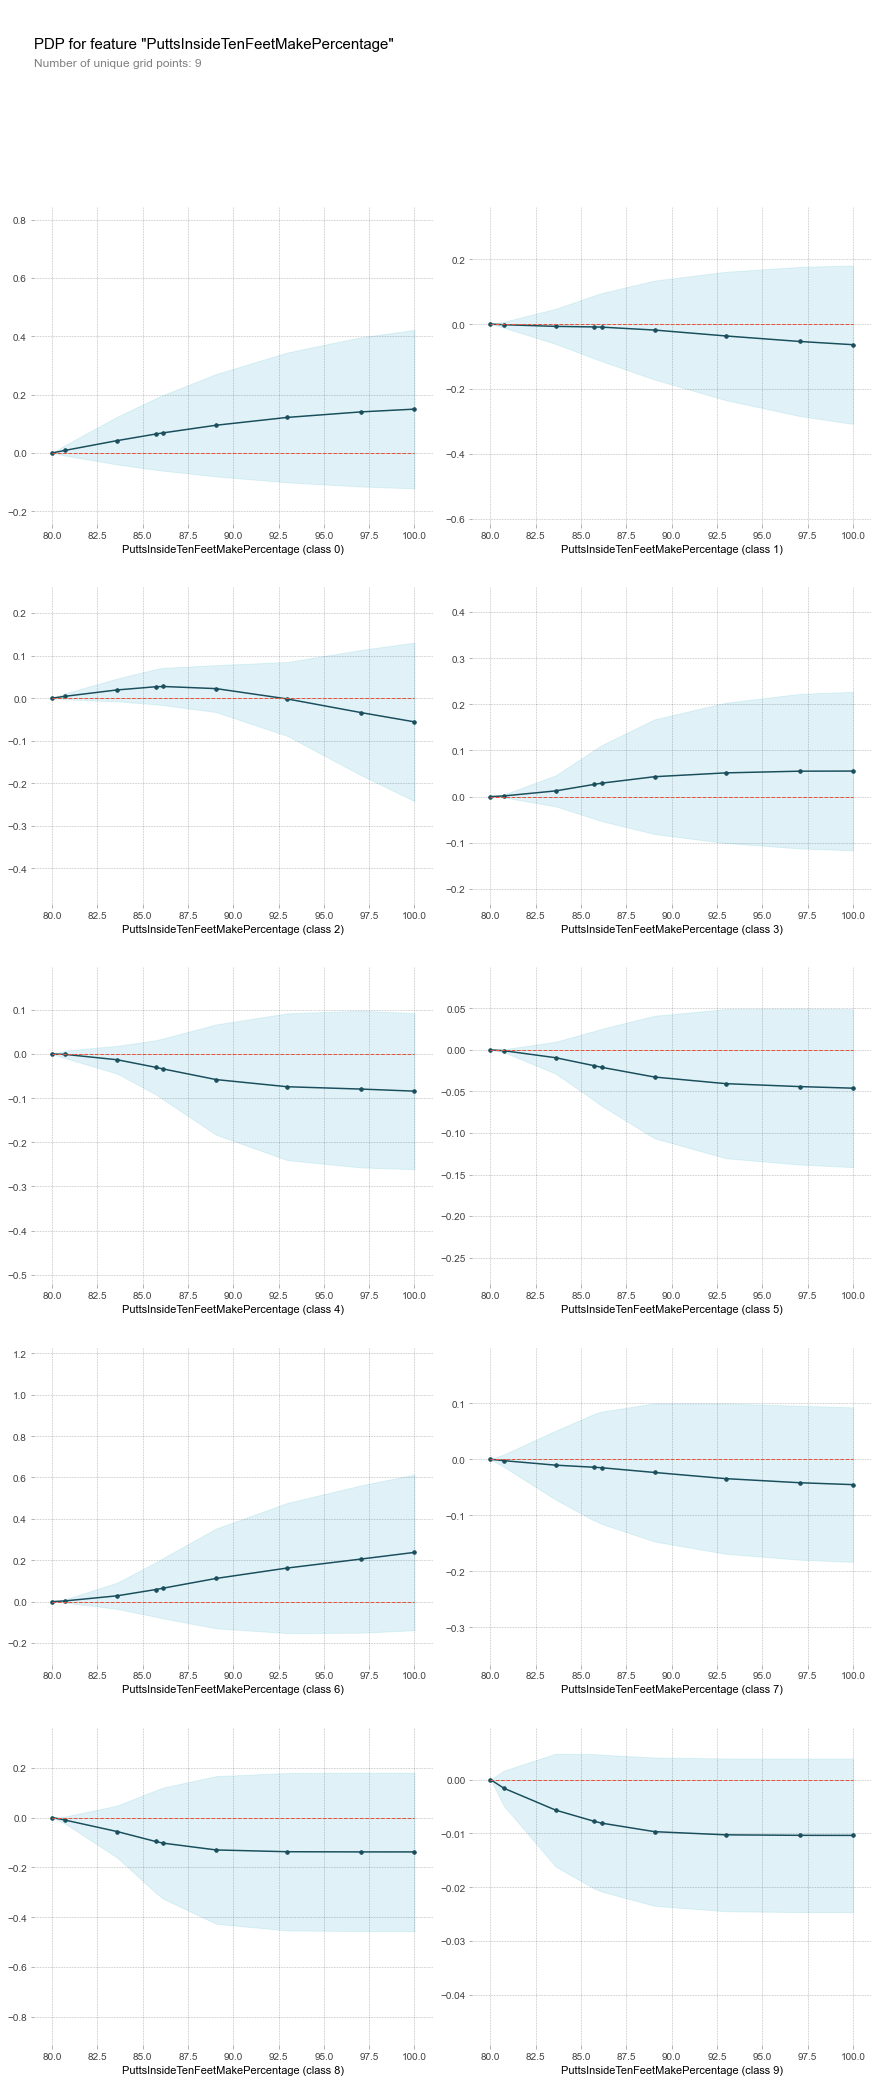

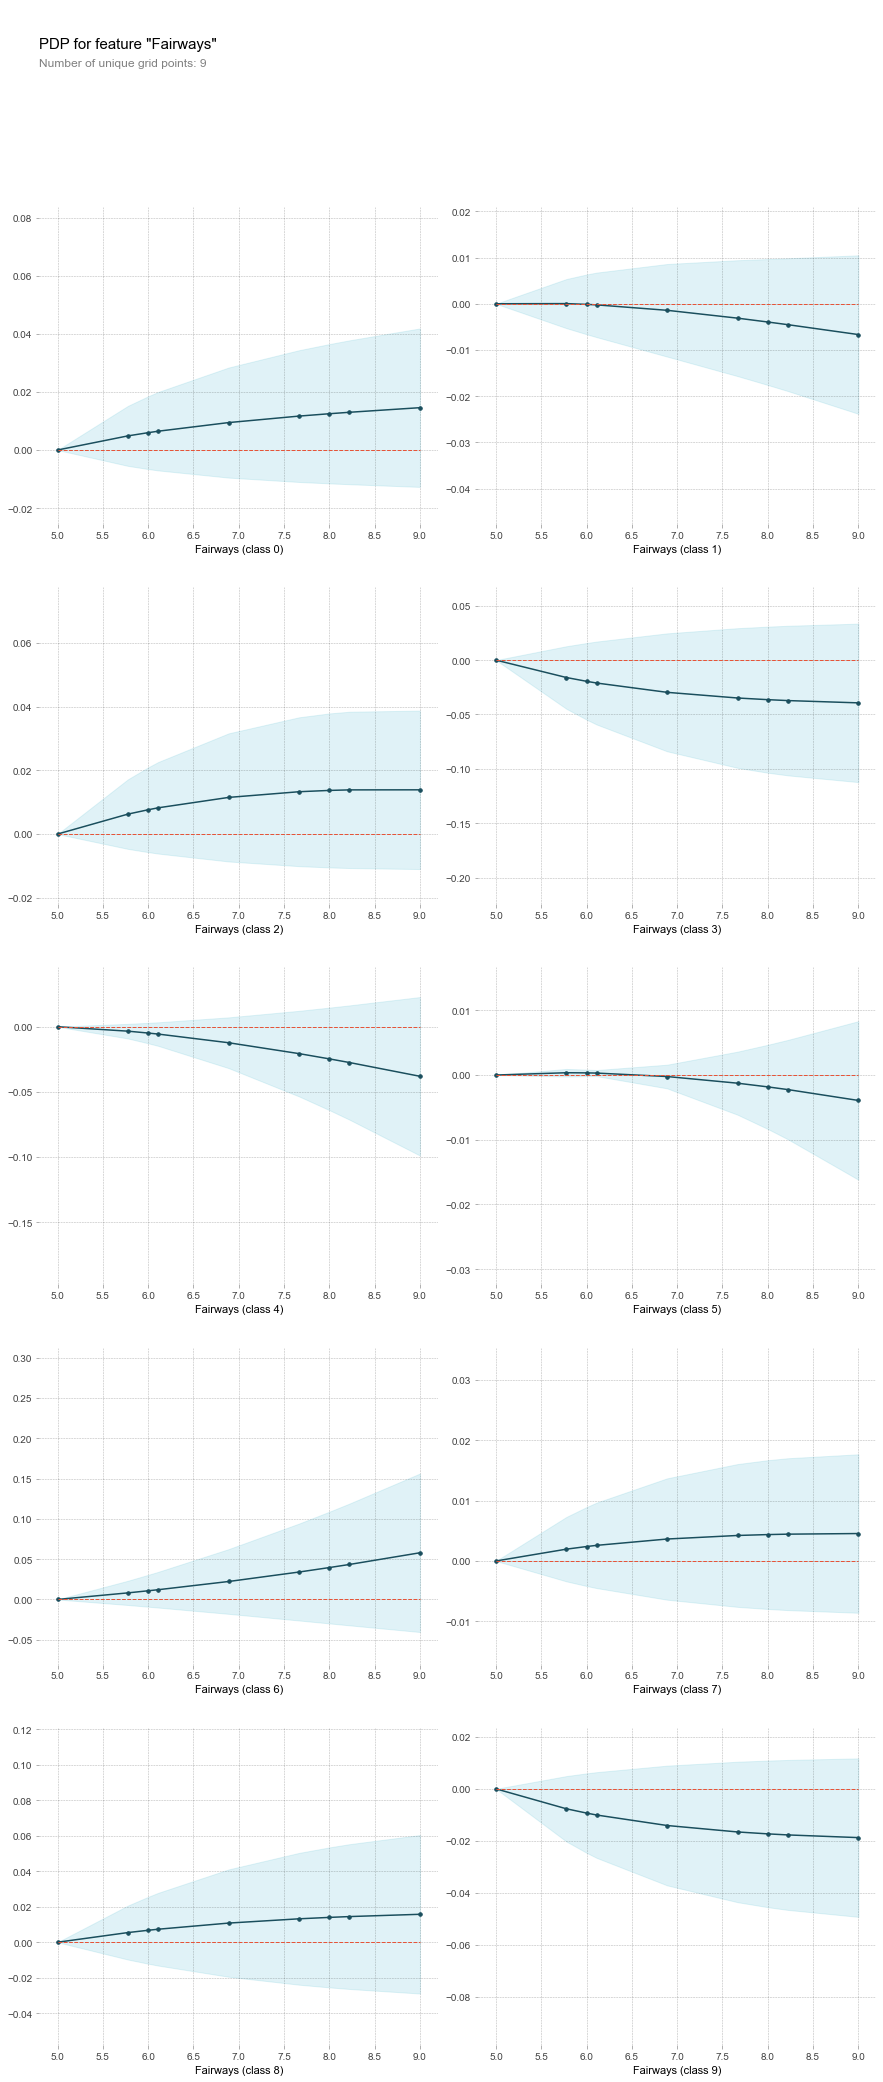

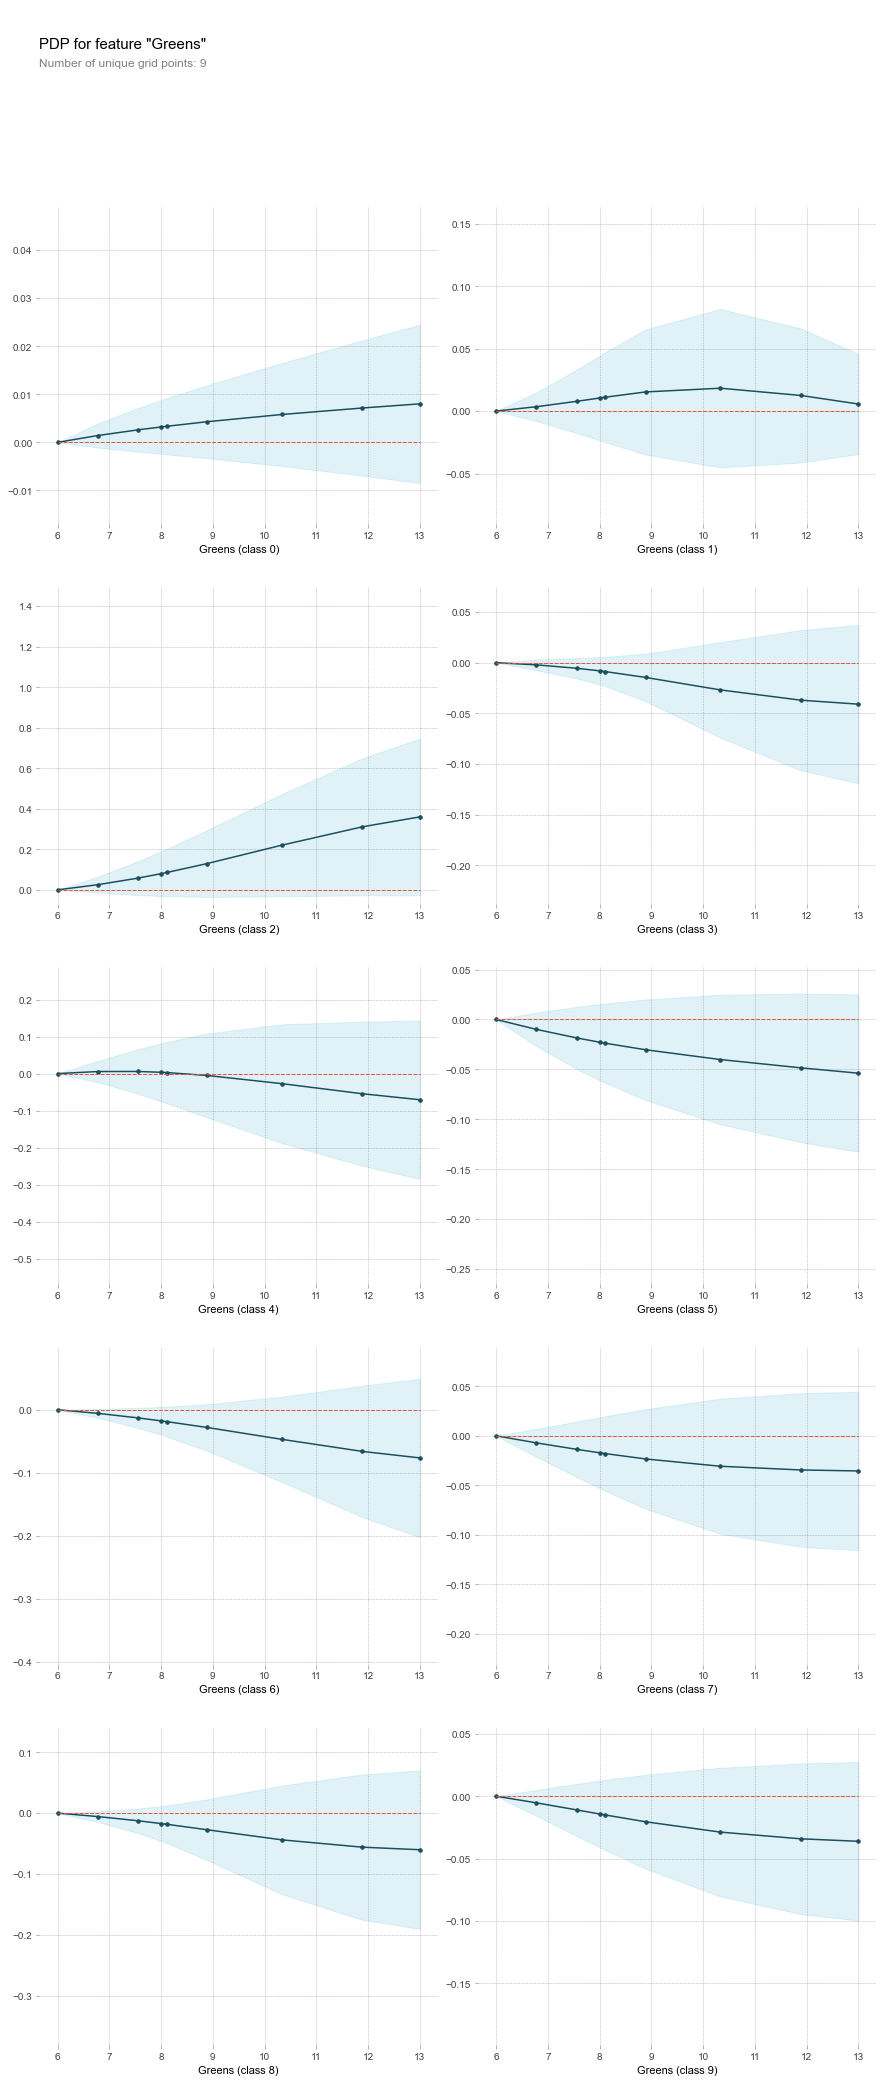

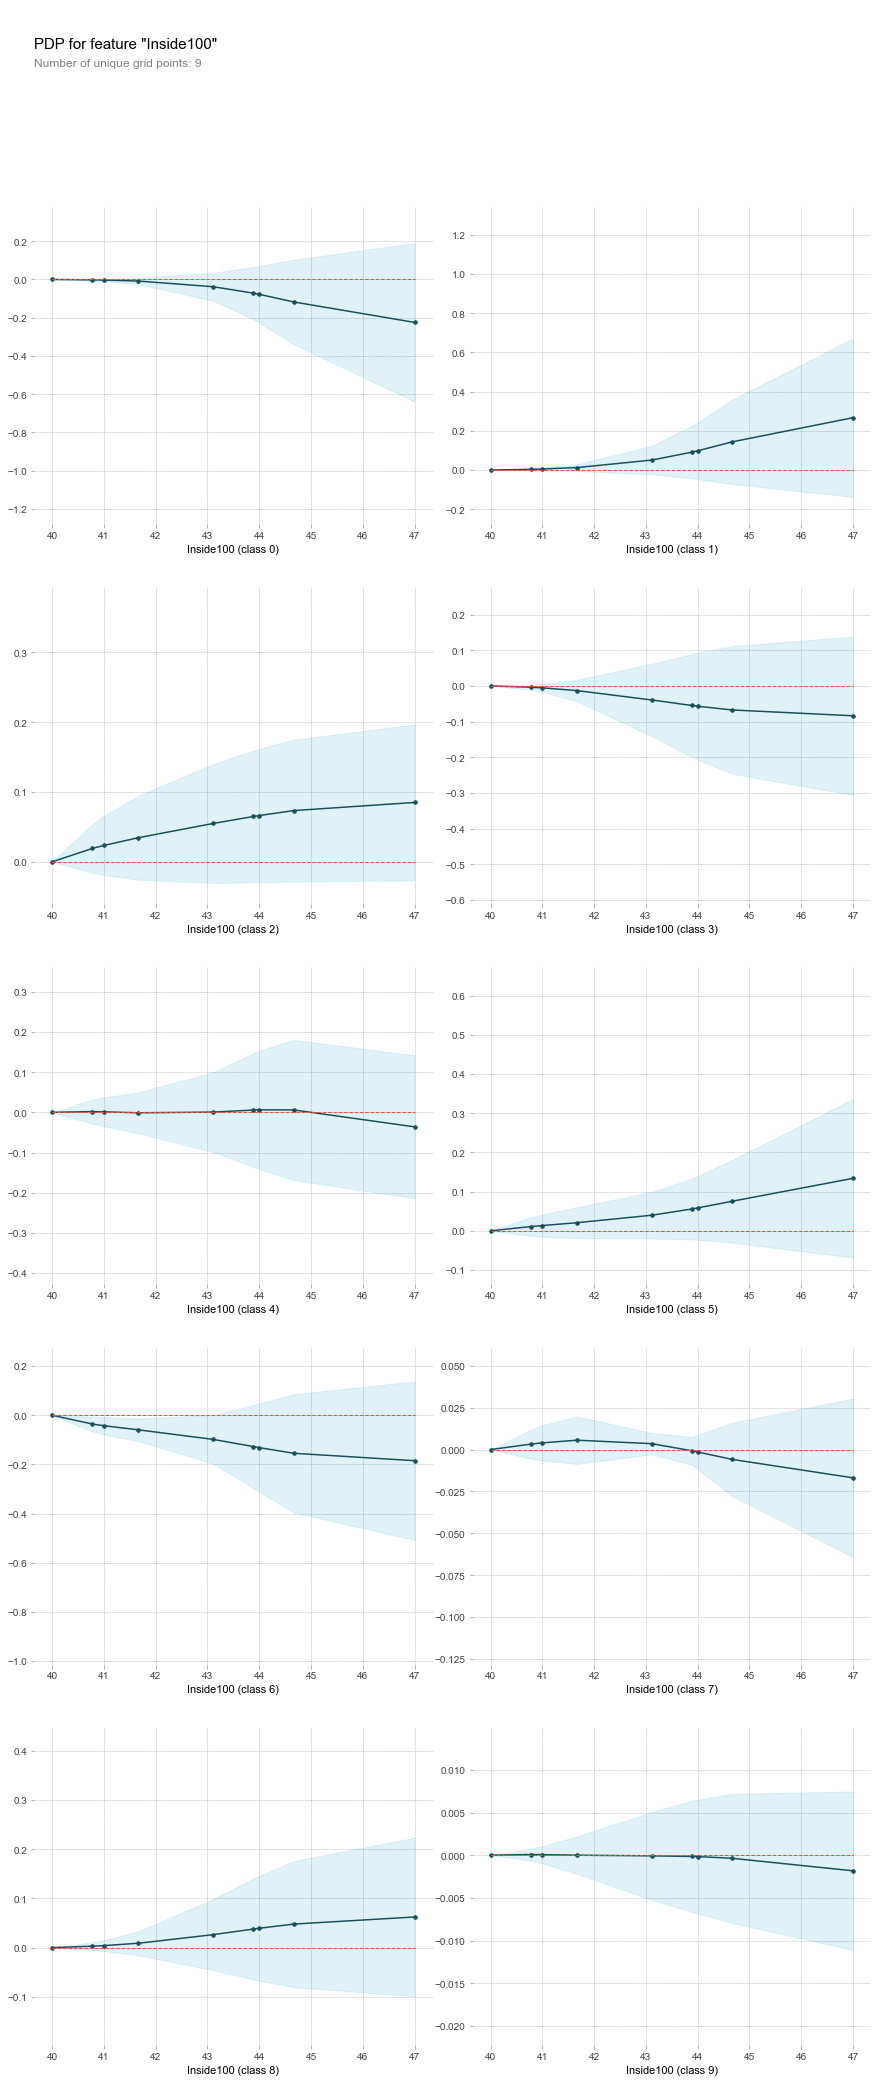

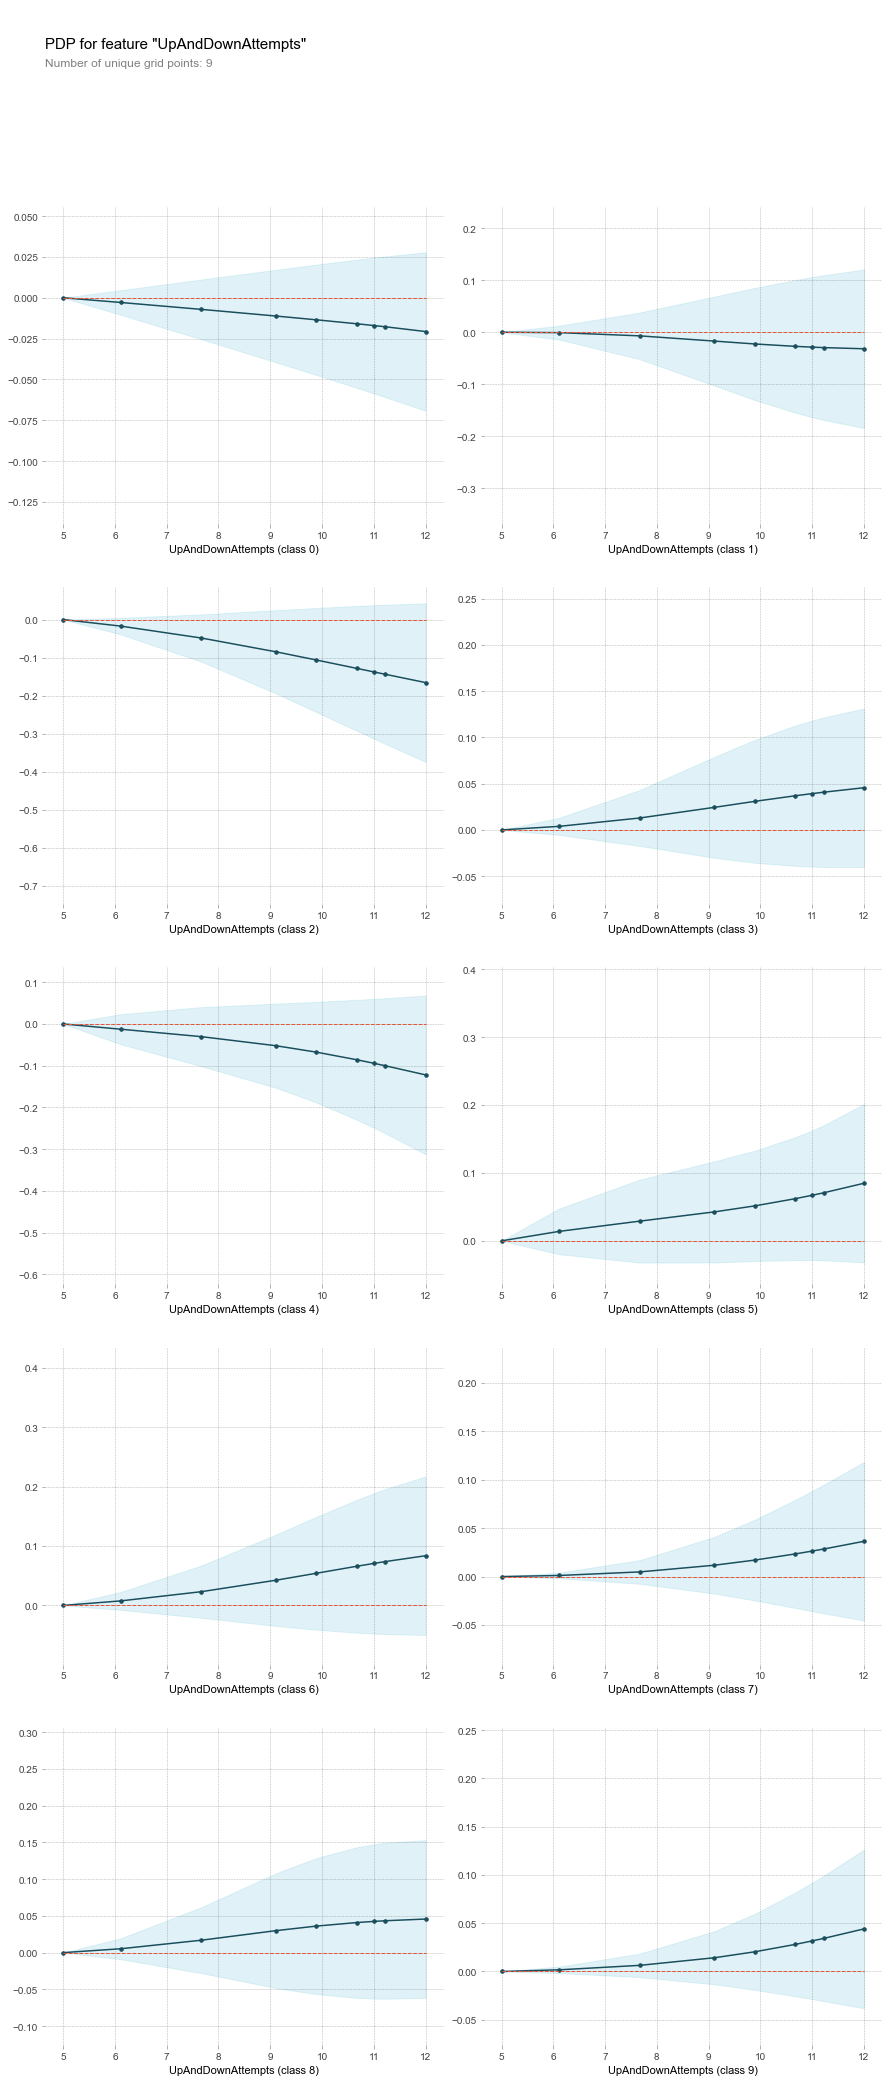

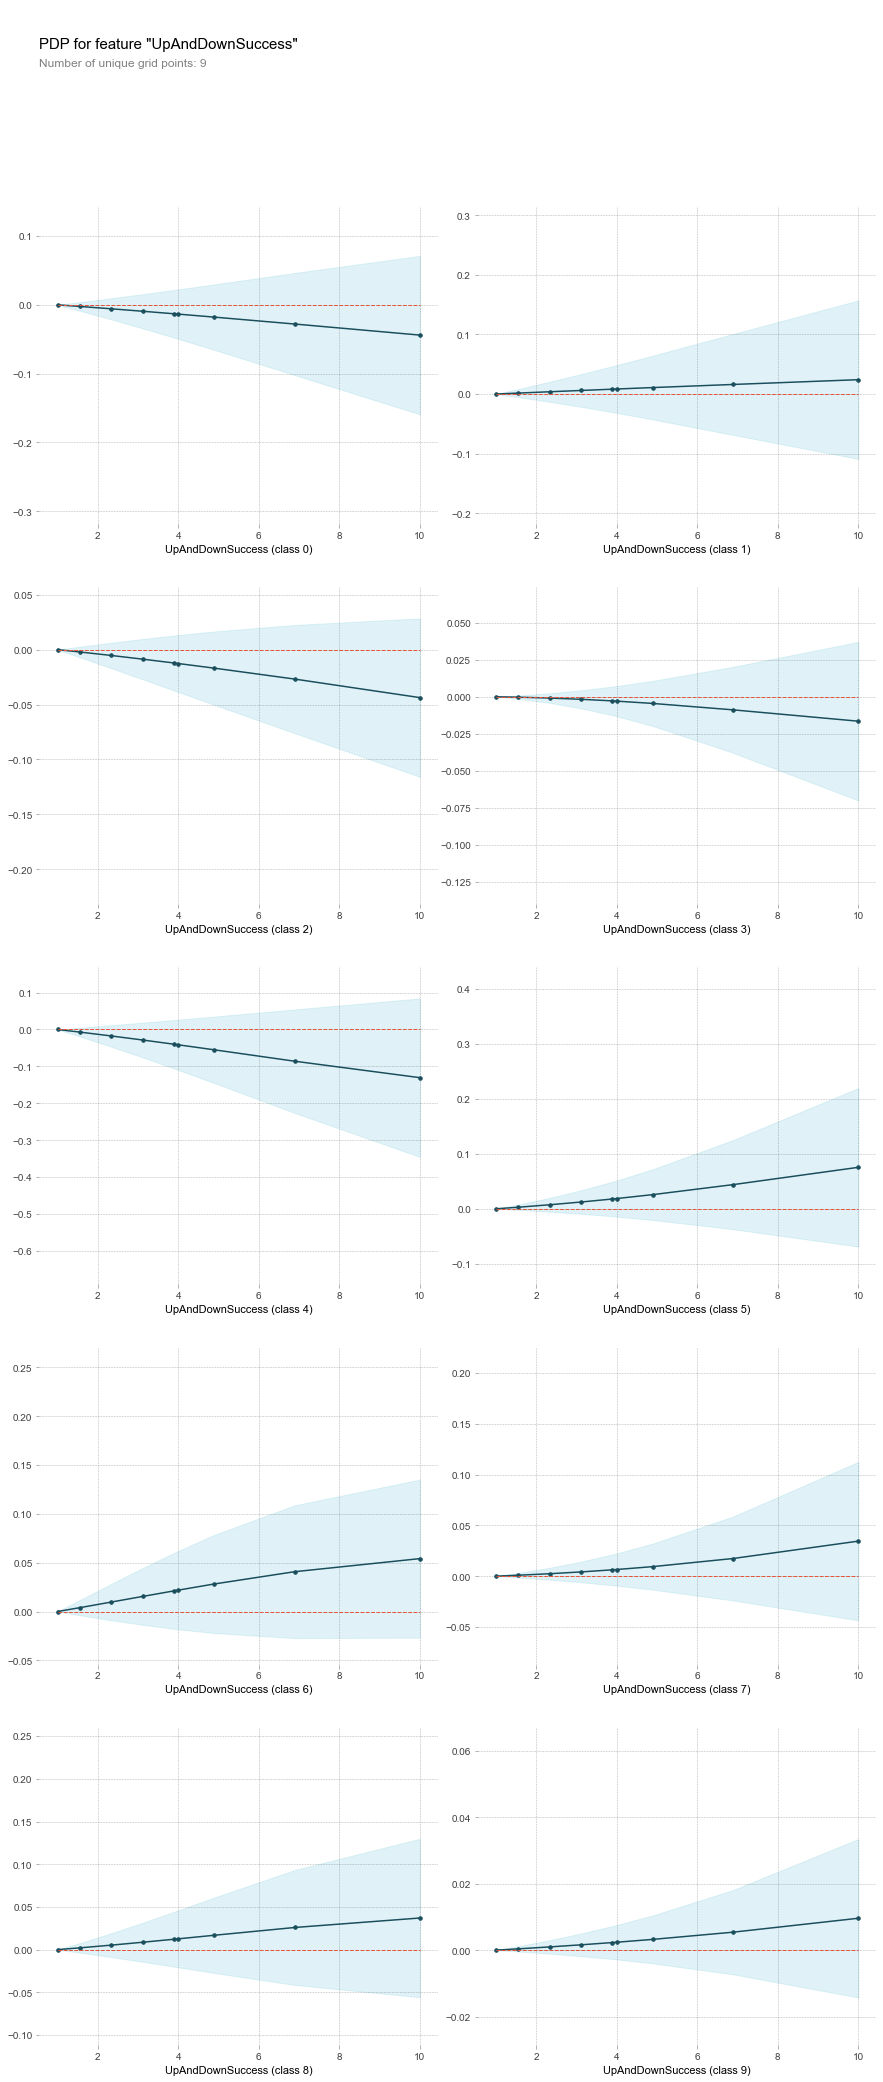

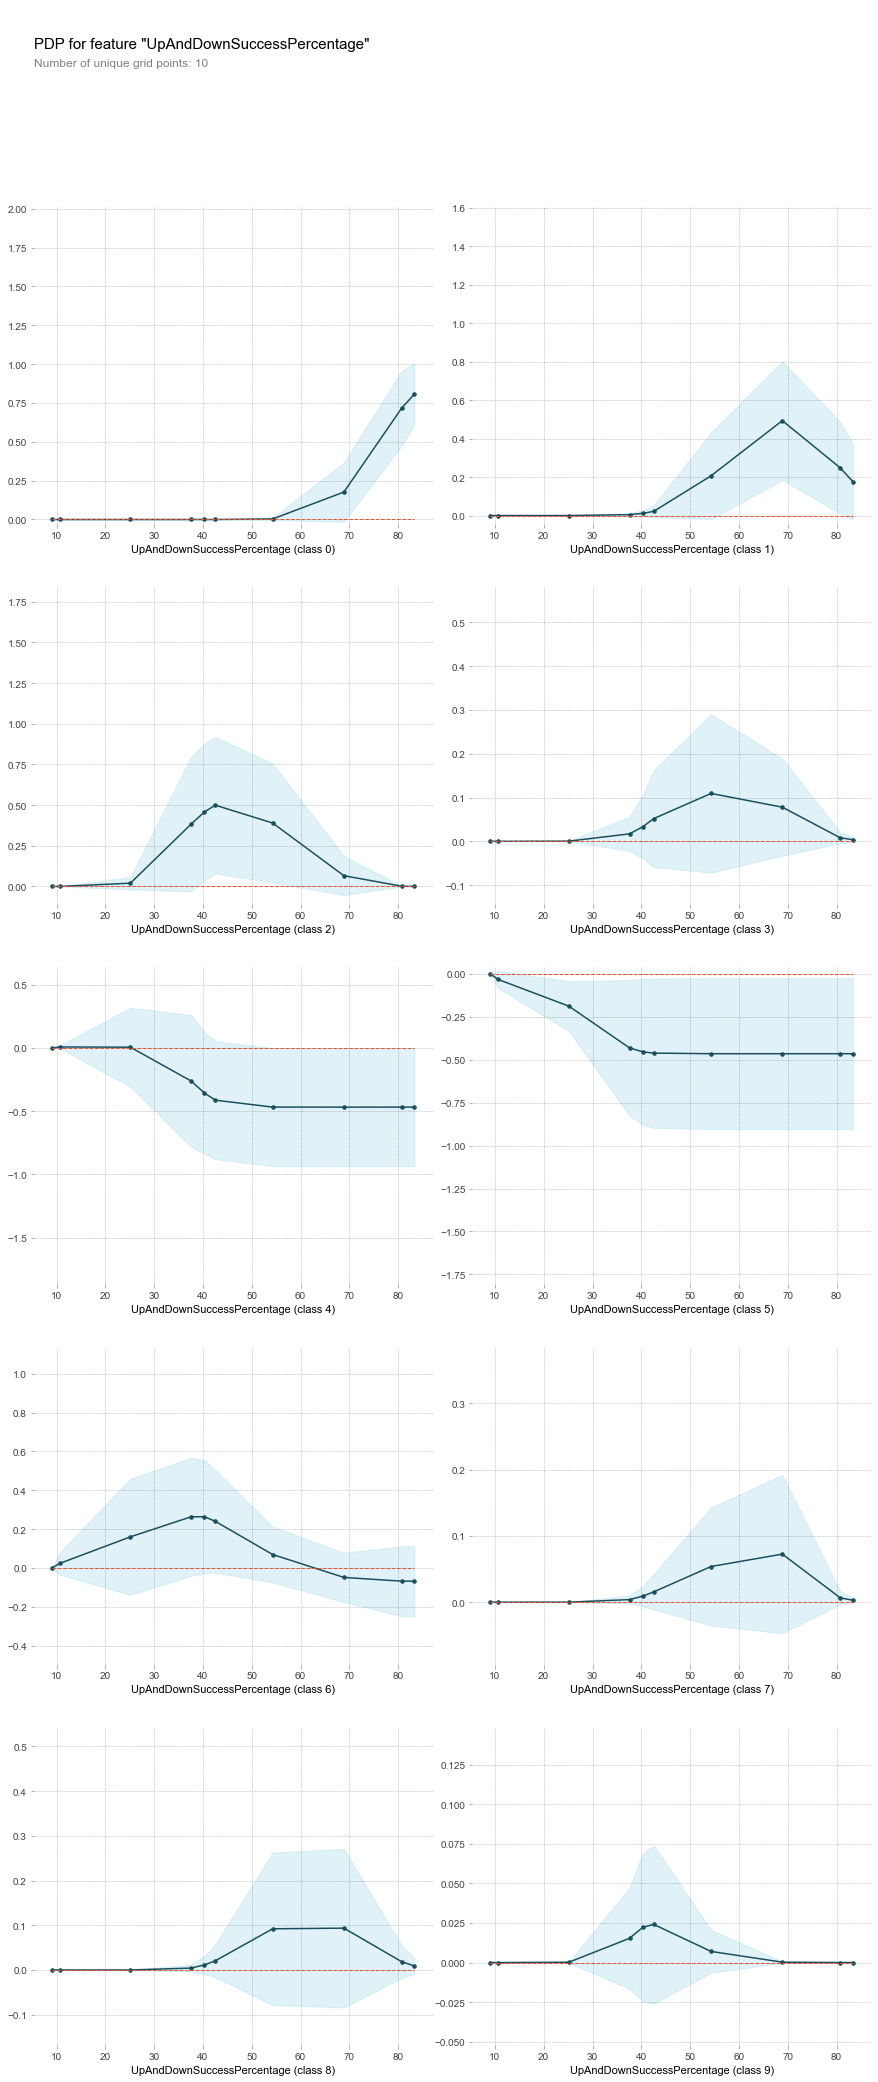

In [82]:
from pdpbox import pdp, get_dataset, info_plots
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model = lr, dataset = val_X, model_features = base_features, feature = feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

In [73]:
rf.fit(train_X, train_y)
perm2 = PermutationImportance(rf, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm2, feature_names = val_X.columns.tolist())

In [74]:
knn.fit(train_X, train_y)
perm3 = PermutationImportance(knn, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm3, feature_names = val_X.columns.tolist())

In [75]:
# Fit all data
knn.fit(train_X, train_y)
reg.fit(train_X, train_y)
lr.fit(train_X, train_y)
rf.fit(train_X, train_y)
# Predict what y will be and add to data frame 
PredictedScore_Knn = knn.predict(val_X)
PredictedScore_Knn = pd.DataFrame(PredictedScore_Knn)
PredictedScore_Knn = PredictedScore_Knn.rename(columns = {0 : 'Knn PredictedScore'})
PredictedScore_reg = reg.predict(val_X)
PredictedScore_reg = pd.DataFrame(PredictedScore_reg)
PredictedScore_reg = PredictedScore_reg.rename(columns = {0 : 'Linear Regression PredictedScore'})
PredictedScore_lr = lr.predict(val_X)
PredictedScore_lr = pd.DataFrame(PredictedScore_lr)
PredictedScore_lr = PredictedScore_lr.rename(columns = {0 : 'Logistic Regression PredictedScore'})
PredictedScore_rf = rf.predict(val_X)
PredictedScore_rf = pd.DataFrame(PredictedScore_rf)
PredictedScore_rf = PredictedScore_rf.rename(columns = {0 : 'Random Forest PredictedScore'})
# Concat all predicted scores to data frame 
PredictedScore = [PredictedScore_Knn, PredictedScore_lr, PredictedScore_reg, PredictedScore_rf]
PredictedScore = pd.concat(PredictedScore, axis = 1)
# Concat predicted scores with data used to predict it 
Predict_X = pd.DataFrame(val_X)
Predict_X = Predict_X.reset_index(drop = True)
Predicition = [Predict_X, PredictedScore]
PredictedScoreWithStats = pd.concat(Predicition, axis = 1)
# Concat predicted scores with actual scorres to compare
Actual_Score = pd.DataFrame(val_y)
Actual_Score = Actual_Score.reset_index(drop = True)
Actual_Score = Actual_Score.rename(columns = {0: 'Actual Score'})
Prediction_With_Actual = [PredictedScoreWithStats, Actual_Score]
Prediction_With_Actual = pd.concat(Prediction_With_Actual, axis = 1)
# Move to csv file 
Prediction_With_Actual.to_csv('Prediction_With_Actual_All_Models.csv')


1. feature 9 (0.144530)
2. feature 0 (0.117418)
3. feature 1 (0.112701)
4. feature 6 (0.109771)
5. feature 8 (0.099364)
6. feature 4 (0.091688)
7. feature 3 (0.090218)
8. feature 5 (0.082424)
9. feature 7 (0.080579)
10. feature 2 (0.071307)


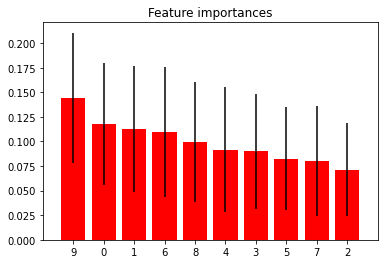

In [76]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(train_X, train_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [77]:
base_features = pd.DataFrame(base_features)
base_features

0
0                             Putts
1       PuttsInsideTenFeetAttempted
2            PuttsInsideTenFeetMade
3  PuttsInsideTenFeetMakePercentage
4                          Fairways
5                            Greens
6                         Inside100
7                 UpAndDownAttempts
8                  UpAndDownSuccess
9        UpAndDownSuccessPercentage

In [78]:
knn.score(train_X, train_y)

0.41379310344827586

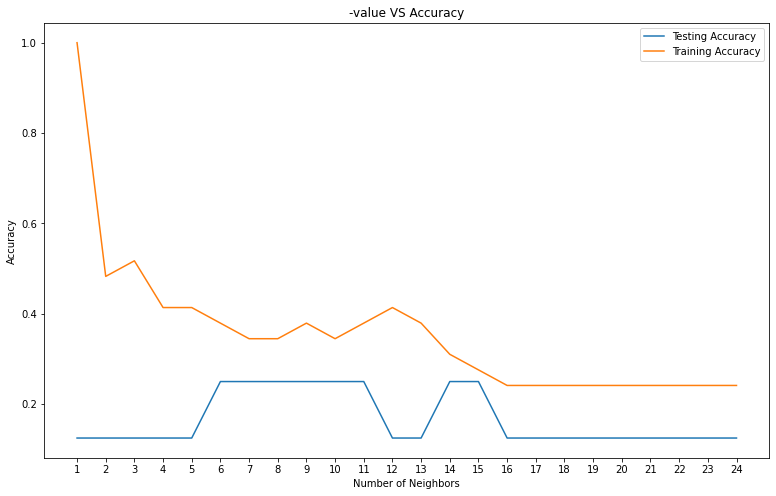

Best accuracy is 0.25 with K = 6


In [79]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(train_X, train_y)
    #train accuracy
    train_accuracy.append(knn.score(train_X, train_y))
    # test accuracy
    test_accuracy.append(knn.score(val_X, val_y))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))